In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('insurance - insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

# Q1. Do smokers have higher insurance charges than non-smokers?

Null Hypothesis: There is no significant difference in insurance rates between smokers and non-smokers.
Alternate Hypothesis: There is a significant difference in insurance rates between smokers and non-smokers.



## Smokers

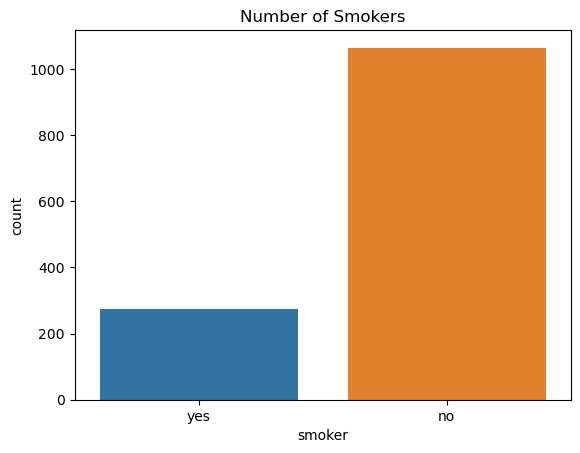

In [3]:
ax = sns.countplot(data = df, x = 'smoker')
ax.set_title('Number of Smokers');

## 2 Sample T-Test Assumptions

1. No Significant Outliers
2. Normality
3. Equal Variance

In [4]:
# split into groups
smokers= df.loc[df['smoker']=="yes", 'charges']
not_smokers = df.loc[df['smoker']=="no", 'charges']

print(f'There are {len(smokers)} smokers and {len(not_smokers)} non-smokers.')
display(smokers.head(), not_smokers.head())

There are 274 smokers and 1064 non-smokers.


0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

In [5]:
# smokers outliers
yes_zscores = stats.zscore(smokers)
yes_outliers = abs(yes_zscores) > 3

# non-smokers outliers
no_zscores = stats.zscore(not_smokers)
no_outliers = abs(no_zscores) > 3

print(f'There are {np.sum(yes_outliers)} outliers for the smokers.')
print(f'There are {np.sum(no_outliers)} outliers for the non-smokers.')

There are 0 outliers for the smokers.
There are 24 outliers for the non-smokers.


In [6]:
# show outliers for non-smokers
outliers = not_smokers[(np.abs(stats.zscore(not_smokers)) > 3)]
outliers.sort_values()

964     26467.09737
379     27000.98473
1142    27117.99378
138     27322.73386
539     27346.04207
140     27375.90478
516     27724.28875
770     27941.28758
443     28287.89766
987     28340.18885
959     28468.91901
806     28476.73499
9       28923.13692
696     29186.48236
1258    30063.58055
62      30166.61817
115     30259.99556
387     30284.64294
573     31620.00106
936     32108.66282
599     33471.97189
242     35160.13457
1012    36580.28216
1206    36910.60803
Name: charges, dtype: float64

In [7]:
print(f'Before the outliers are removed, there are {len(not_smokers)} non-smokers')

no_group = not_smokers[(np.abs(stats.zscore(not_smokers)) <= 3)]

print(f'After the outliers are removed, there are {len(not_smokers)} non-smokers')

Before the outliers are removed, there are 1064 non-smokers
After the outliers are removed, there are 1064 non-smokers


## Normality Testing

In [8]:
# smokers
smokers_results = stats.normaltest(smokers)

# nonsmokers
nonsmokers_results= stats.normaltest(not_smokers)

print(f'Smokers: {smokers_results}')
print(f'Non-Smokers:{nonsmokers_results}')

Smokers: NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)
Non-Smokers:NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)


The p-values from the normality tests are less than 0.05 for both the smokers and non-smokers. This indicates that our data is not normally distributed.


## Equal Variance Testing

In [9]:
v_result = stats.levene(smokers, not_smokers)
v_result

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

The p-value from the equal variance test is less than our threshold of 0.05. Therefore, we can conclude that our data does not have equal variance

## Ttesting 

In [10]:
ttest_result = stats.ttest_ind(smokers, not_smokers, equal_var = False)
ttest_result

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)

The p-value for our T-Test is below 0.05, which means we can reject the null hypothesis. This indicates a significant difference between the charges of smokers and non-smokers.

Therefore, we conclude that smokers and non-smokers have unequal insurance charges, supporting the alternative hypothesis.

# Q2. Are men more likely to smoke than women?

There are two categorical variables (ordinal or nominal)
The outcomes are independent.

Null Hypothesis: Men ARE NOT more likely to smoke than women.

Alternate Hypothesis: Men ARE more likely to smoke than women.

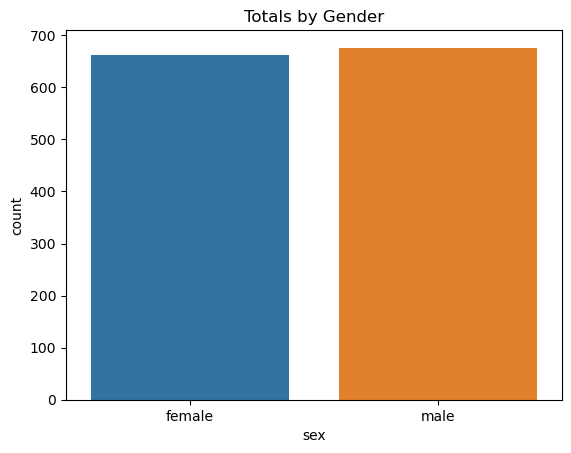

In [12]:
ax = sns.countplot(data = df, x = 'sex')
ax.set_title("Totals by Gender");

## Chi-Squared Test Assumptions
There are two categorical variables (ordinal or nominal)
The outcomes are independent.

In [13]:
# Contingency Table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [14]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [15]:
# Print p-value and verify if its less than alpha
print(f'p-value: {p}')
p < .05


p-value: 0.006548143503580696


True

The p-value from the Chi-Squared Test is less than 0.05, indicating that we can reject the null hypothesis. This suggests that men are more likely to smoke than women.

Based on this result, we conclude that there is an unequal likelihood of smoking between men and women, supporting the alternative hypothesis that men are indeed more likely to smoke than women.

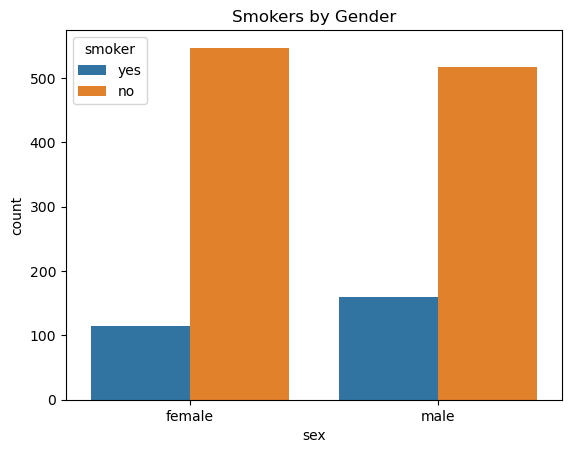

In [16]:
ax = sns.countplot(data = df, x = 'sex', hue = 'smoker')
ax.set_title("Smokers by Gender");

# Q3. Do different regions have different charges, on average?

Null Hypothesis (H0): There is no significant difference between the insurance rates of different regions.

Alternate Hypothesis (H1): There is a significant difference between the insurance rates of different regions.

## ANOVA Test Assumptions
1. No significant outliers
2. Equal variance
3. Normality

In [17]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

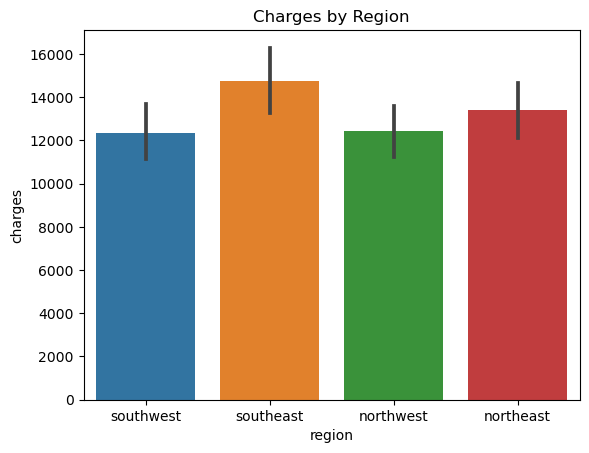

In [18]:
ax = sns.barplot(data = df, x = 'region', y = 'charges')
ax.set_title("Charges by Region");

In [19]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
print(groups.keys())
groups

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])


{'southwest': 0       16884.92400
 12       1826.84300
 15       1837.23700
 18      10602.38500
 19      36837.46700
            ...     
 1316     1731.67700
 1329    10325.20600
 1331    10795.93733
 1332    11411.68500
 1336     2007.94500
 Name: charges, Length: 325, dtype: float64,
 'southeast': 1        1725.5523
 2        4449.4620
 5        3756.6216
 6        8240.5896
 11      27808.7251
            ...    
 1322    12981.3457
 1323    43896.3763
 1327     9377.9047
 1330    12629.1656
 1335     1629.8335
 Name: charges, Length: 364, dtype: float64,
 'northwest': 3       21984.47061
 4        3866.85520
 7        7281.50560
 9       28923.13692
 24       6203.90175
            ...     
 1319     7201.70085
 1320     5425.02335
 1324     4239.89265
 1333    10600.54830
 1337    29141.36030
 Name: charges, Length: 325, dtype: float64,
 'northeast': 8        6406.41070
 10       2721.32080
 16      10797.33620
 17       2395.17155
 20      13228.84695
            ...     
 1321

## Remove Outliers

In [20]:
# iterate through groups
for region, charges in groups.items():
    zscores = stats.zscore(charges)
    outliers = abs(zscores) > 3
    print(f"Outliers for {region} region: {np.sum(outliers)}")

    print(f'Before the outliers are removed, there are {len(groups[region])} samples in the {region} region')
    groups[region] = charges[(np.abs(stats.zscore(charges)) <= 3)]
    print(f'After the {np.sum(outliers)} outliers are removed, there are {len(groups[region])} samples in the {region} region')
    print()

Outliers for southwest region: 8
Before the outliers are removed, there are 325 samples in the southwest region
After the 8 outliers are removed, there are 317 samples in the southwest region

Outliers for southeast region: 2
Before the outliers are removed, there are 364 samples in the southeast region
After the 2 outliers are removed, there are 362 samples in the southeast region

Outliers for northwest region: 7
Before the outliers are removed, there are 325 samples in the northwest region
After the 7 outliers are removed, there are 318 samples in the northwest region

Outliers for northeast region: 4
Before the outliers are removed, there are 324 samples in the northeast region
After the 4 outliers are removed, there are 320 samples in the northeast region



## Normality Testing

In [21]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,317.0,7.728611e-22,97.223886
southeast,362.0,1.936990e-13,58.544942
northwest,318.0,2.940543e-19,85.341045
northeast,320.0,3.557877e-17,75.749565


In [22]:
### checking char with pandas 
norm_results_df['significance'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,significance
southwest,317.0,7.728611e-22,97.223886,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,318.0,2.940543e-19,85.341045,True
northeast,320.0,3.557877e-17,75.749565,True


The normality tests indicate that all the regions have p-values below 0.05, indicating that our data is not normally distributed.

Since the charges are not normally distributed and we have more than 15 samples in each region, we have a sufficiently large dataset to proceed with the ANOVA Test.

## Equal Variance Testing

In [23]:
# EV Test with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

In [24]:
# EV Test entering each group manually
stats.levene(groups['southwest'], groups['southeast'],
            groups['northwest'],
            groups['northeast'])

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

In [25]:
norm_results_df['n']

southwest    317.0
southeast    362.0
northwest    318.0
northeast    320.0
Name: n, dtype: float64

## Kruskal-Wallis Test

In [26]:
result = stats.kruskal(*groups.values())
result

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

The p-value from the Kruskal-Wallis Test is greater than 0.05, indicating that we can support the null hypothesis. This suggests that there is no significant difference between the insurance rates of different regions.

Therefore, we conclude that the different regions have equal or similar insurance rates, rejecting the alternative hypothesis that there is a significant difference between them.

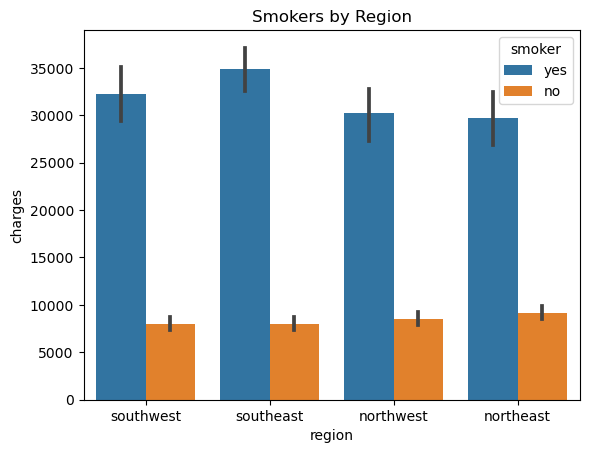

In [27]:
ax = sns.barplot(data = df, x = 'region', y = 'charges', hue = 'smoker')
ax.set_title("Smokers by Region");